In [688]:
import numpy as np
import matplotlib.pyplot as plt

In [689]:
np.random.seed(45)

In [690]:
def noise(mu, sigma, K):
    return np.random.normal(mu, sigma, K)

In [691]:
def f_0(r, X_):
    C = np.ones(len(X_))
    return r * C

def f_1(q, r, X_):
    return q*X_ + r

def f_2(p, q, r, X_):
    return p*X_**2 + q*X_ + r

In [692]:
a, b, c = 1000, 10, 1

X = np.random.uniform(0, 5, 3)
mean = 0
sigma = 1
# X = np.array([1, 2, 3])
Y = f_2(a, b, c, X) + noise(mean, sigma, 3)
print("X : ", X)
print("Y : ", Y)

X :  [4.94505757 2.74772363 1.40723651]
Y :  [24503.94092823  7577.67079543  1994.75479325]


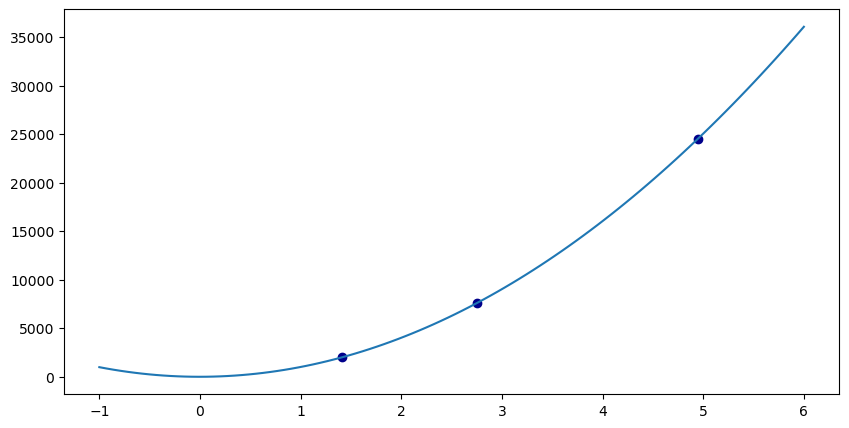

In [693]:
# Creating vectors X and Y
x = np.linspace(-1, 6, 100)
y = f_2(a, b, c, x)
 
fig = plt.figure(figsize = (10, 5))
# Create the plot
plt.plot(x, y)
plt.scatter(X, Y, color = 'darkblue')
 
plt.show()

In [694]:
N = 1000

In [695]:
def Ex_1(a,b,c):
    val = a*5**3/3 + b*5**2/2 + c*5
    val /= 5
    return val

In [696]:
def Ex_2(a,b,c):
    val = a*a*5**4 + b*b*5**3/3 + c*c*5 + 2*a*b*5**4 /4 + 2*b*c*5*5 /2 + 2*a*c*5**3 / 3
    val /= 5
    return val

In [697]:
def normal_pdf(x, mu, sigma):
    return 1 / (np.sqrt(2 * np.pi * sigma * sigma)) * np.exp(-0.5 * (x - mu) * (x - mu) / (sigma * sigma))

In [698]:
def fit_f0(X_, Y_):
    # return np.sum(Y_) / 3
    return np.polyfit(X_, Y_, 0)[0]

def g_bar_0():
    c_avg = 0

    for _ in range(N):
        #generating dataset
        X_i = np.random.uniform(0, 5, 3)
        n_ = noise(mean, sigma, 3)
        Y_i = f_2(a, b, c, X_i) + n_

        c_i = fit_f0(X_i, Y_i)
        prob_n_ = normal_pdf(n_, mean, sigma)

        c_avg +=  c_i
    
    return c_avg / N

8222.452816031424


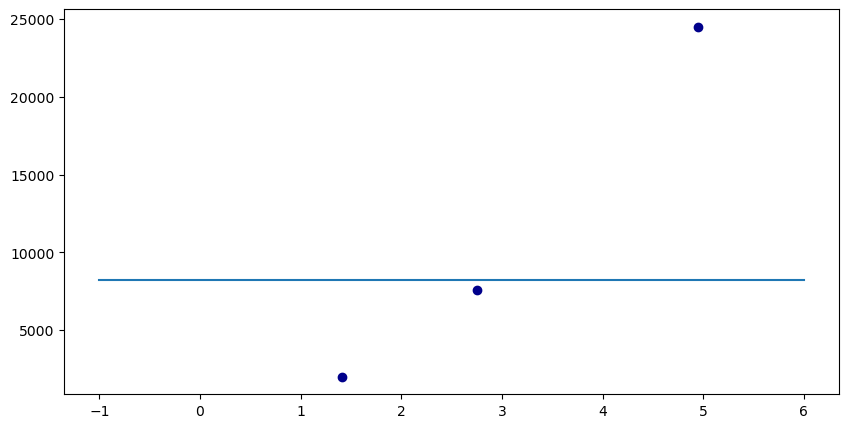

In [699]:
# Creating vectors X and Y
x = np.linspace(-1, 6, 100)
g0_c_ = g_bar_0()

print(g0_c_)

y = f_0(g0_c_, x)
 
fig = plt.figure(figsize = (10, 5))

# Create the plot
plt.plot(x, y)
plt.scatter(X, Y, color = 'darkblue')
 
plt.show()

In [700]:
def Ed_Eout_0():
    c_avg = 0
    gbar = g_bar_0()
    for _ in range(N):
        #generating dataset
        X_i = np.random.uniform(0, 5, 3)
        Y_i = f_2(a,b,c, X_i) + noise(mean, sigma, 3)

        #fitting dataset
        gd = fit_f0(X_i, Y_i)  
        c_avg += (gd - gbar)
        
    c_avg  = c_avg / N

    var_gd = Ex_2(0,0,c_avg)

    bias_gd = Ex_2(a,b,c-gbar)

    var_e = sigma**2

    # print(var_gd,bias_gd,var_e)
    return var_gd + bias_gd + var_e

In [701]:
h0_error = Ed_Eout_0()
h0_error

55896308.71672735

In [702]:
def fit_f1(X_, Y_):
    # too mathematical just use the library 
    return np.polyfit(X_, Y_, 1) 
     

def g_bar_1():
    b_avg, c_avg = 0, 0

    for _ in range(N):
        X_i = np.random.uniform(0, 5, 3)
        n_ = noise(mean, sigma, 3)
        Y_i = f_2(a, b, c, X_i) + n_

        b_i, c_i = fit_f1(X_i, Y_i)
        prob_n_ = normal_pdf(n_, mean, sigma)

        b_avg += np.prod(prob_n_) * b_i
        c_avg += np.prod(prob_n_) * c_i
    
    return b_avg, c_avg

110164.9596516144 -118963.72510398582


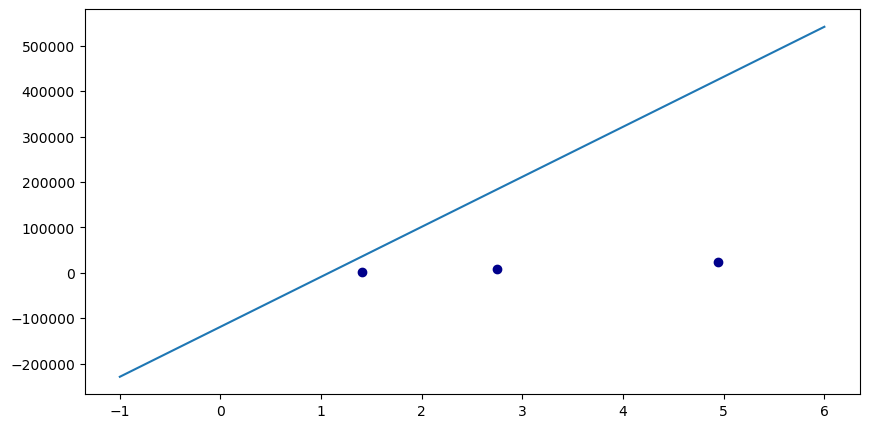

In [703]:
# Creating vectors X and Y
x = np.linspace(-1, 6, 100)
g1_b_, g1_c_ = g_bar_1()

print(g1_b_, g1_c_)

y = f_1(g1_b_, g1_c_, x)
 
fig = plt.figure(figsize = (10, 5))

# Create the plot
plt.plot(x, y)
plt.scatter(X, Y, color = 'darkblue')
 
plt.show()

In [704]:
def Ed_Eout_1():
    c_avg = 0
    b_avg = 0
    gbar_b,gbar_c = g_bar_1()
    for _ in range(N):
        #generating dataset
        X_i = np.random.uniform(0, 5, 3)
        Y_i = f_2(a,b,c, X_i) + noise(mean, sigma, 3)

        #fitting dataset
        gd_b,gd_c = fit_f1(X_i,Y_i)
        b_avg += gd_b - gbar_b
        c_avg += gd_c - gbar_c
        
    c_avg  = c_avg / N
    b_avg = b_avg / N

    var_gd = Ex_2(0,b_avg,c_avg)

    bias_gd = Ex_2(a,b-gbar_b,c-gbar_c)

    var_e = sigma**2

    # print(var_gd,bias_gd,var_e)
    return var_gd + bias_gd + var_e

In [705]:
h1_error = Ed_Eout_1()
h1_error

86916093578.52547

In [706]:
def fit_f2(X_, Y_):
    return np.polyfit(X_, Y_, 2)

def g_bar_2():
    a_avg, b_avg, c_avg = 0, 0, 0

    for _ in range(N):
        X_i = np.random.uniform(0, 5, 3)
        n_ = noise(mean, sigma, 3)
        Y_i = f_2(a, b, c, X_i) + n_

        a_i, b_i, c_i = fit_f2(X_i, Y_i)
        prob_n_ = normal_pdf(n_, mean, sigma)

        a_avg += np.prod(prob_n_) * a_i
        b_avg += np.prod(prob_n_) * b_i
        c_avg += np.prod(prob_n_) * c_i
    
    return a_avg, b_avg, c_avg

22309.81924953606 -861.6298373517759 1016.0558725215592


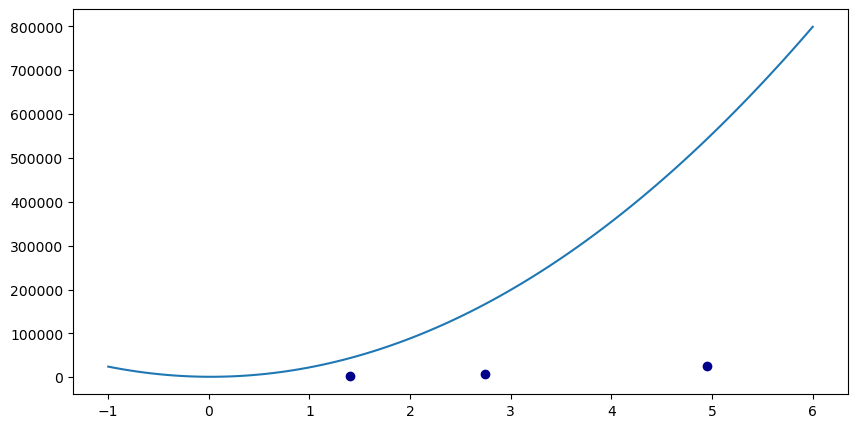

In [707]:
# Creating vectors X and Y
x = np.linspace(-1, 6, 100)
g2_a_, g2_b_, g2_c_ = g_bar_2()

print(g2_a_, g2_b_, g2_c_)

y = f_2(g2_a_, g2_b_, g2_c_, x)

fig = plt.figure(figsize = (10, 5))

# Create the plot
plt.plot(x, y)
plt.scatter(X, Y, color = 'darkblue')
 
plt.show()

In [708]:
def Ed_Eout_2():
    c_avg = 0
    a_avg = 0
    b_avg = 0
    gbar_a,gbar_b,gbar_c = g_bar_2()
    for _ in range(N):
        #generating dataset
        X_i = np.random.uniform(0, 5, 3)
        Y_i = f_2(a,b,c, X_i) + noise(mean, sigma, 3)

        #fitting dataset
        gd_a,gd_b,gd_c = fit_f2(X_i,Y_i)
        a_avg += gd_a - gbar_a
        b_avg += gd_b - gbar_b
        c_avg += gd_c - gbar_c
        
    c_avg  = c_avg / N
    b_avg = b_avg / N
    a_avg = a_avg / N
    
    var_gd = Ex_2(a_avg,b_avg,c_avg)

    bias_gd = Ex_2(a-gbar_a,b-gbar_b,c-gbar_c)

    var_e = sigma**2

    # print(var_gd,bias_gd,var_e)
    return var_gd + bias_gd + var_e

In [709]:
h2_error = Ed_Eout_2()
h2_error

21492740806.50126

In [710]:
if(h0_error < h1_error and h0_error < h2_error):
    print("Min Error on h0:(const)")
elif(h1_error < h0_error and h1_error < h2_error):
    print("Min error on h1:(linear)")    
else:
    print("Min Error on h2:(quadratic)")

Min Error on h0:(const)


In [711]:
h0_error

55896308.71672735

In [712]:
h1_error

86916093578.52547

In [713]:
h2_error

21492740806.50126